In [57]:
# Shashi Bhushan
# MSDS DSC 630, Spring 2023
# Project Milestone 4

In [58]:
# Importing libraries
import pandas as pd
import numpy as np

In [59]:
# Reading CSV File
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [60]:
# Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [61]:
# finding percentage of missing values in each feature
import numpy as np
for column in df.columns:
    print('{} has {} % missing values'.format(column,np.round(df[column].isnull().sum()/len(df)*100,4)))

HeartDisease has 0.0 % missing values
BMI has 0.0 % missing values
Smoking has 0.0 % missing values
AlcoholDrinking has 0.0 % missing values
Stroke has 0.0 % missing values
PhysicalHealth has 0.0 % missing values
MentalHealth has 0.0 % missing values
DiffWalking has 0.0 % missing values
Sex has 0.0 % missing values
AgeCategory has 0.0 % missing values
Race has 0.0 % missing values
Diabetic has 0.0 % missing values
PhysicalActivity has 0.0 % missing values
GenHealth has 0.0 % missing values
SleepTime has 0.0 % missing values
Asthma has 0.0 % missing values
KidneyDisease has 0.0 % missing values
SkinCancer has 0.0 % missing values


In [62]:
# dropping duplicate rows if any
df.drop_duplicates(inplace=True)
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


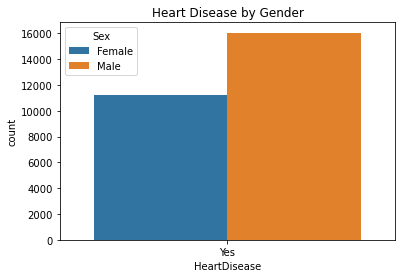

In [63]:
#  Bar chart showing count of males and females having heart disease.
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Heart Disease by Gender")
df2= df[df.HeartDisease=="Yes"]
sns.countplot(x ='HeartDisease', hue = "Sex", data = df2)
plt.show()

<AxesSubplot:ylabel='None'>

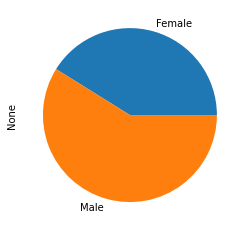

In [64]:
# Associated Piechart
df2.groupby('Sex').size().plot.pie()

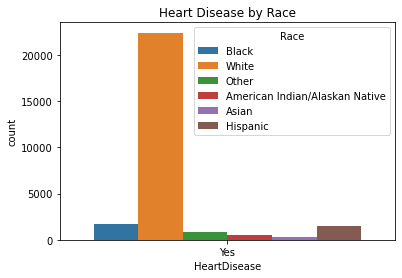

In [65]:
# Bar chart showing counts by races having heart disease.
plt.title("Heart Disease by Race")
sns.countplot(x ='HeartDisease', hue = "Race", data = df2)
plt.show()

<AxesSubplot:ylabel='None'>

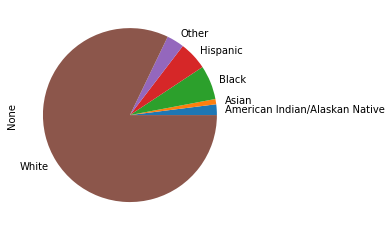

In [66]:
# Associated Pie Chart
df2.groupby('Race').size().plot.pie()

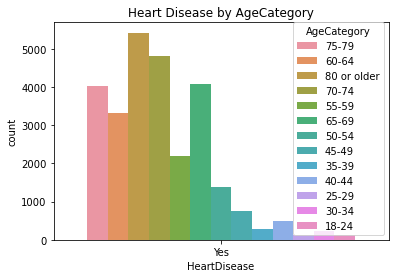

In [67]:
# Bar chart showing counts by age group having heart disease
plt.title("Heart Disease by AgeCategory")
sns.countplot(x ='HeartDisease', hue = "AgeCategory", data = df2)
plt.show()

<AxesSubplot:ylabel='None'>

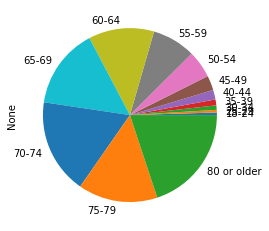

In [68]:
# Associated Pie Chart
df2.groupby('AgeCategory').size().plot.pie()

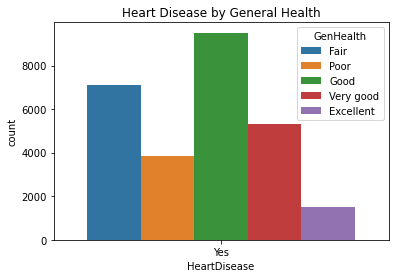

In [69]:
# Bar chart showing count by general health having heart disease.
plt.title("Heart Disease by General Health")
sns.countplot(x ='HeartDisease', hue = "GenHealth", data = df2)
plt.show()

<AxesSubplot:ylabel='None'>

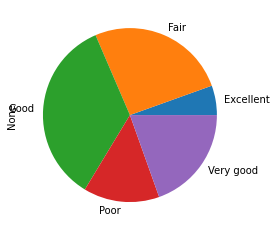

In [70]:
# Associated Pie Chart
df2.groupby('GenHealth').size().plot.pie()

In [71]:
# Checking if sample per race and gender categories for assuring normalcy
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()

Sex     HeartDisease
Female  No              148458
        Yes              11213
Male    No              125998
        Yes              16048
Name: HeartDisease, dtype: int64

In [72]:
df.groupby(['Race','HeartDisease'])['HeartDisease'].count()

Race                            HeartDisease
American Indian/Alaskan Native  No                4650
                                Yes                542
Asian                           No                7727
                                Yes                266
Black                           No               21081
                                Yes               1729
Hispanic                        No               25664
                                Yes               1443
Other                           No               10005
                                Yes                886
White                           No              205329
                                Yes              22395
Name: HeartDisease, dtype: int64

In [73]:
# All numbers are over 30. Therefore, all categories can be assumed to be normally distributed.

In [74]:
# Creating dummy variables for object features
df =pd.get_dummies(df)
df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,...,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,1,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,1
1,20.34,0.0,0.0,7.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,26.58,20.0,30.0,8.0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
3,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0


In [75]:
# Removing redundant binary variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 52 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   BMI                                  301717 non-null  float64
 1   PhysicalHealth                       301717 non-null  float64
 2   MentalHealth                         301717 non-null  float64
 3   SleepTime                            301717 non-null  float64
 4   HeartDisease_No                      301717 non-null  uint8  
 5   HeartDisease_Yes                     301717 non-null  uint8  
 6   Smoking_No                           301717 non-null  uint8  
 7   Smoking_Yes                          301717 non-null  uint8  
 8   AlcoholDrinking_No                   301717 non-null  uint8  
 9   AlcoholDrinking_Yes                  301717 non-null  uint8  
 10  Stroke_No                            301717 non-null  uint8  
 11  Stroke_Yes   

In [76]:
df = df.drop(['HeartDisease_No', 'Smoking_No', 'AlcoholDrinking_No', 'Stroke_No', 'DiffWalking_No', 'Sex_Female', 'PhysicalActivity_No', 'Asthma_No', 'KidneyDisease_No', 'SkinCancer_No'], axis=1)

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
BMI,1.000000,0.103813,0.056724,-0.048653,0.047260,0.015890,-0.043463,0.016314,0.177388,0.024200,...,0.006676,-0.144441,-0.172330,0.122887,0.110611,0.059747,-0.068584,0.087563,0.047796,-0.038060
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406,0.165235,0.110270,-0.023255,0.132966,0.422935,-0.038427,...,-0.003011,-0.224121,-0.170597,0.297801,-0.049225,0.470076,-0.196522,0.110083,0.138219,0.036753
MentalHealth,0.056724,0.279657,1.000000,-0.117078,0.020913,0.078364,0.045421,0.041324,0.142964,-0.098916,...,0.016415,-0.084274,-0.104461,0.143266,0.001844,0.188198,-0.085304,0.105266,0.032105,-0.040214
SleepTime,-0.048653,-0.058406,-0.117078,1.000000,0.010834,-0.027874,-0.003172,0.013697,-0.019155,-0.014901,...,-0.010997,-0.000157,0.035006,-0.038369,-0.009956,-0.031684,0.018630,-0.045368,0.008028,0.043241
HeartDisease_Yes,0.047260,0.165235,0.020913,0.010834,1.000000,0.104524,-0.036289,0.194665,0.196420,0.074435,...,-0.015508,-0.093597,-0.113218,0.143265,0.031748,0.172437,-0.100540,0.035784,0.142672,0.090644
Smoking_Yes,0.015890,0.110270,0.078364,-0.027874,0.104524,1.000000,0.109183,0.058868,0.115789,0.087514,...,-0.007271,-0.089864,-0.107082,0.091346,0.050007,0.084953,-0.053652,0.017545,0.031890,0.030438
AlcoholDrinking_Yes,-0.043463,-0.023255,0.045421,-0.003172,-0.036289,0.109183,1.000000,-0.022707,-0.041135,0.006824,...,-0.005308,0.024408,0.022824,-0.023800,-0.013807,-0.019809,0.018050,-0.007114,-0.031166,-0.008739
Stroke_Yes,0.016314,0.132966,0.041324,0.013697,0.194665,0.058868,-0.022707,1.000000,0.170664,-0.001343,...,-0.005574,-0.074898,-0.072065,0.101445,0.008392,0.131741,-0.068225,0.034942,0.089109,0.046039
DiffWalking_Yes,0.177388,0.422935,0.142964,-0.019155,0.196420,0.115789,-0.041135,0.170664,1.000000,-0.067335,...,-0.009166,-0.271748,-0.171623,0.276789,0.021949,0.306152,-0.184921,0.095826,0.149471,0.060596
Sex_Male,0.024200,-0.038427,-0.098916,-0.014901,0.074435,0.087514,0.006824,-0.001343,-0.067335,1.000000,...,-0.087183,0.045309,0.020717,-0.020016,0.006179,-0.009216,-0.006222,-0.067960,-0.007579,0.015846


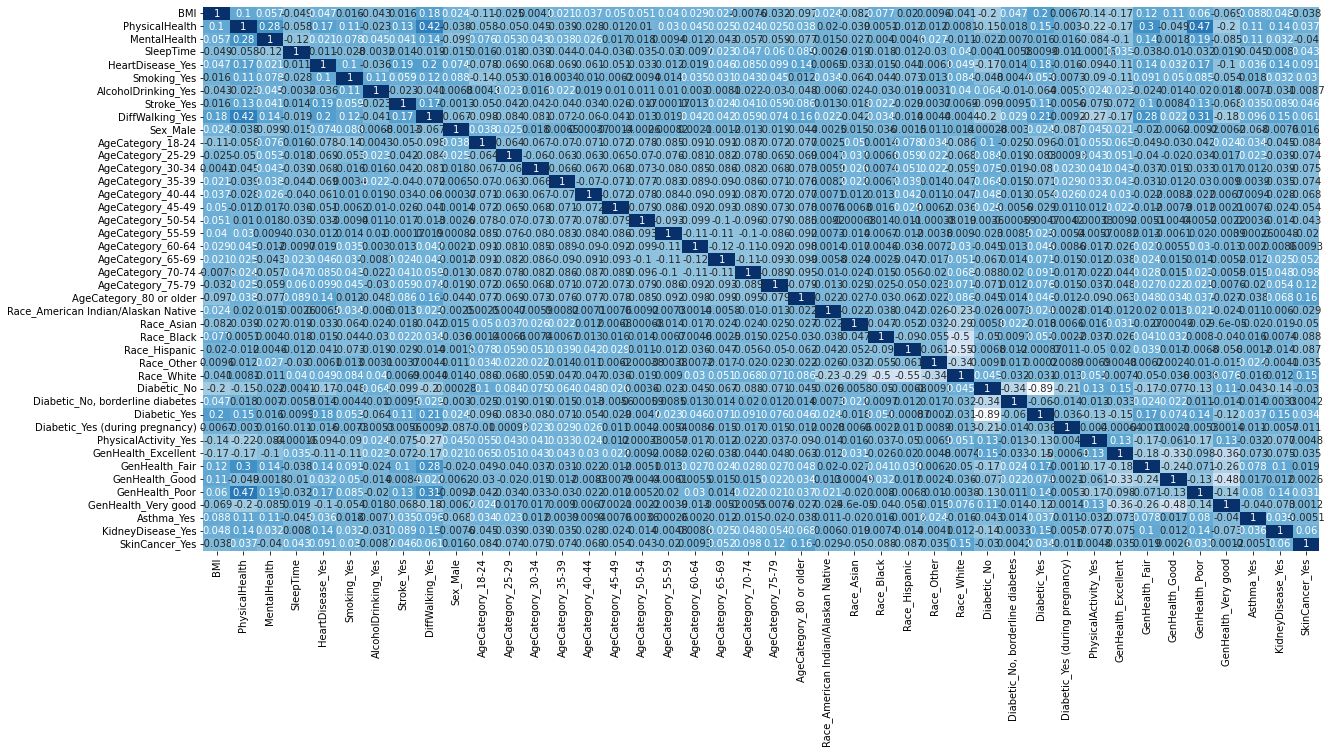

In [77]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Develop a heatmap showing correlation between features, in particular checking correlation with heart disease.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='Blues')
df.corr()

In [78]:
#  Bar chart showing count of males and females having heart disease.
# Performing feature selection using ANOVA using HeartDisease_Yes as target 
y = df['HeartDisease_Yes']
X = df.drop(['HeartDisease_Yes'], axis=1)

In [79]:
from sklearn.feature_selection import f_regression, SelectKBest
fs=SelectKBest(score_func=f_regression,k=41)
fit=fs.fit(X,y)

In [80]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
feature_score.columns = ["Input_Features", "F_Score", "P_Value"]
print(feature_score.nlargest(49,columns="F_Score"))

                         Input_Features       F_Score  P_Value
7                       DiffWalking_Yes  12107.521989   0.0000
6                            Stroke_Yes  11883.653926   0.0000
30                         Diabetic_Yes   9977.628745   0.0000
36                       GenHealth_Poor   9246.264913   0.0000
28                          Diabetic_No   8546.074566   0.0000
1                        PhysicalHealth   8468.849439   0.0000
21              AgeCategory_80 or older   6340.524990   0.0000
34                       GenHealth_Fair   6322.399758   0.0000
39                    KidneyDisease_Yes   6269.072727   0.0000
33                  GenHealth_Excellent   3917.668974   0.0000
4                           Smoking_Yes   3332.705949   0.0000
37                  GenHealth_Very good   3080.976499   0.0000
20                    AgeCategory_75-79   2959.167902   0.0000
32                 PhysicalActivity_Yes   2666.493472   0.0000
40                       SkinCancer_Yes   2499.555671  

In [81]:
# We see that all features have P-Value of less than 0.05. Therefore, all features are selcted for modeling.

In [82]:
# Importing the train_test_split Function and splitting dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [84]:
#I use the standard scaler function to scale the values into a common range.Then I build Logistic Regression Model. 
scaler = StandardScaler()
lr = LogisticRegression()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [85]:
# Train Logistic Regression on the training data
lr.fit(X_train_scaler,y_train)

LogisticRegression()

In [86]:
#Evaluationg the model using accuracy score
y_test_pred = lr.predict(X_test_scaler)
accuracy = accuracy_score( y_test, y_test_pred)
accuracy

0.9099993371337664

In [87]:
# Accuracy is 91%

In [88]:
#Accuracy on model training data
y_train_pred =lr.predict(X_train_scaler)
accuracy = accuracy_score( y_train, y_train_pred)
accuracy

0.9116346898783211

In [89]:
# Accuracy is 91%. #Accuracy is slightly higher to that calculated above. Therefore slight overfitting.

In [90]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_test_pred)

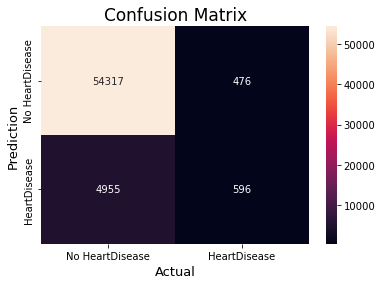

In [91]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No HeartDisease','HeartDisease'],
            yticklabels=['No HeartDisease','HeartDisease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [92]:
print(classification_report(y_test, y_test_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54793
           1       0.56      0.11      0.18      5551

    accuracy                           0.91     60344
   macro avg       0.74      0.55      0.57     60344
weighted avg       0.88      0.91      0.88     60344



In [93]:
'''We see that while the accuracy of the model is good, its performance is not very good while predicting heart diseases as seen
for the precision, recall and f1-score for "1."'''

'We see that while the accuracy of the model is good, its performance is not very good while predicting heart diseases as seen\nfor the precision, recall and f1-score for "1."'

In [94]:
# Now training on KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaler,y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
#Evaluationg the model using accuracy score
y_pred = knn.predict(X_test_scaler)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8900139201909055

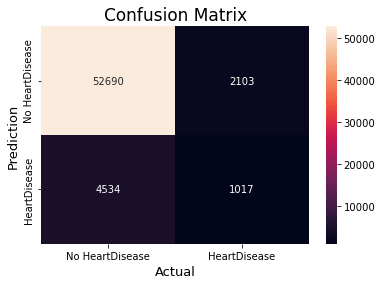

In [96]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No HeartDisease','HeartDisease'],
            yticklabels=['No HeartDisease','HeartDisease'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [97]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     54793
           1       0.33      0.18      0.23      5551

    accuracy                           0.89     60344
   macro avg       0.62      0.57      0.59     60344
weighted avg       0.87      0.89      0.88     60344



In [98]:
'''We see that while the accuracy of the model is good; however, its performance is not very good while predicting heart 
diseases as seen for the precision, recall and f1-score for "1."'''

'We see that while the accuracy of the model is good; however, its performance is not very good while predicting heart \ndiseases as seen for the precision, recall and f1-score for "1."'

In [99]:
# Explain your process for prepping the data
'''
Data was primarily consisting of objects and therefore converted into dummy variables.
I checked for missing data but no missing data was observed.
I removed the duplicates.
Created barcharts and piecharts to visualize the data and see representation of categories such as race and gender.
ANOVA was used for feature selection. However, all p-values were noted to be less than 0.05 and therefore, no feature was
dropped.
'''

'\nData was primarily consisting of objects and therefore converted into dummy variables.\nI checked for missing data but no missing data was observed.\nI removed the duplicates.\nCreated barcharts and piecharts to visualize the data and see representation of categories such as race and gender.\nANOVA was used for feature selection. However, all p-values were noted to be less than 0.05 and therefore, no feature was\ndropped.\n'

In [100]:
#Build and evaluate at least one model
'''
I built and evaluated two models namely Logistic Regression and K Nearest Neighbor.
Used K as three as the model produced optimum results.
'''

'\nI built and evaluated two models namely Logistic Regression and K Nearest Neighbor.\nUsed K as three as the model produced optimum results.\n'

In [101]:
# Interpret your results
'''
Following are my observations from the visualizations:
Heart disease is more prevalent in males than females.
White people had the maximum number in positive heart disease cases. However , this is reflective of the population proportion in the U.S.
Age does play a role in heart disease as the barchart showed that people in higher age ranges had more positive heart disease cases.
The surprise finding was that a lot the highest number of people having heart disease were in good general health.

Three models produced high accuracy percentages with Logistic Regression  and Knn  
producing 91% and 89% respectively. However, upon generation of the classification reports for the two models,
it was observed that though the model precision, recall, and f-1 scores are very high for predicting "No heart disease;"
howver, these scores are not good for predicting "heart disease." Logistic Regression Classifer has a decent 57% as 
precision score.
'''

'\nFollowing are my observations from the visualizations:\nHeart disease is more prevalent in males than females.\nWhite people had the maximum number in positive heart disease cases. However , this is reflective of the population proportion in the U.S.\nAge does play a role in heart disease as the barchart showed that people in higher age ranges had more positive heart disease cases.\nThe surprise finding was that a lot the highest number of people having heart disease were in good general health.\n\nThree models produced high accuracy percentages with Logistic Regression  and Knn  \nproducing 91% and 89% respectively. However, upon generation of the classification reports for the two models,\nit was observed that though the model precision, recall, and f-1 scores are very high for predicting "No heart disease;"\nhowver, these scores are not good for predicting "heart disease." Logistic Regression Classifer has a decent 57% as \nprecision score.\n'

In [102]:
# Initial Conclusions and Recommendations
'''
Since the maximum number of people in the data set having heart disease were in good general health, a prediction model
becomes important.

Precision is the proportion of every observation predicted to be positive that is actually positive. Therefore, I
recommend use of Logistic Regression classifer for predicting the heart disease.

'''

'\nSince the maximum number of people in the data set having heart disease were in good general health, a prediction model\nbecomes important.\n\nPrecision is the proportion of every observation predicted to be positive that is actually positive. Therefore, I\nrecommend use of Logistic Regression classifer for predicting the heart disease.\n\n'